In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#setting the seed number for code reproducibility
np.random.seed(147)
random.seed(147)

# Loading the Dataset

In [3]:
#reading data
data=pd.read_csv("assignment-1-data.csv")

In [4]:
pd.set_option("display.precision", 2)

In [5]:
data.shape
#there are 22 features in the dataset and, for each feature 2938 data is avaliable

(2938, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#Selecting categorical columns
categorical_columns = ['Country', 'Status','Year']
data[categorical_columns].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.sample(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1234,Iraq,2015,Developing,68.9,182.0,32,NaN,0.00,56.0,1433,...,63.0,NaN,58.0,0.1,4974.27,3.61e+07,5.3,5.1,0.65,10.1
1827,Nepal,2001,Developing,63.2,23.0,43,0.09,21.93,NaN,10849,...,73.0,5.36,72.0,0.1,248.62,2.42e+07,18.3,19.0,0.45,9.0
337,Botswana,2014,Developing,65.1,268.0,2,0.01,662.80,95.0,1,...,96.0,5.41,95.0,2.3,7497.76,2.17e+06,6.7,6.4,0.70,12.6
2422,South Sudan,2002,Developing,52.0,382.0,30,NaN,0.00,NaN,0,...,NaN,NaN,NaN,3.3,NaN,7.24e+06,NaN,NaN,0.00,0.0
2402,South Africa,2006,Developing,54.0,496.0,54,8.50,732.13,83.0,81,...,79.0,7.57,82.0,28.1,5631.73,4.82e+06,1.6,12.8,0.61,12.9
1663,Mauritania,2003,Developing,63.0,226.0,8,0.01,29.65,NaN,3611,...,75.0,4.53,76.0,1.3,528.59,2.96e+06,1.3,1.1,0.45,6.6
1599,Malaysia,2002,Developing,72.9,14.0,4,0.49,216.70,95.0,408,...,94.0,3.40,94.0,0.1,4167.36,2.42e+07,9.5,9.3,0.72,12.0
785,Dominican Republic,2000,Developing,72.0,176.0,7,6.58,44.79,68.0,253,...,71.0,5.90,78.0,2.5,282.42,8.56e+06,3.8,3.7,0.65,12.2
331,Bosnia and Herzegovina,2004,Developing,75.5,99.0,0,4.25,3.48,36.0,28,...,87.0,9.40,84.0,0.1,265.64,3.78e+06,3.0,3.0,0.00,12.3
1027,Greece,2014,Developing,88.0,73.0,0,7.53,2163.04,96.0,1,...,99.0,8.80,99.0,0.1,21673.78,1.89e+06,0.8,0.7,0.86,17.2


# Categorical Features

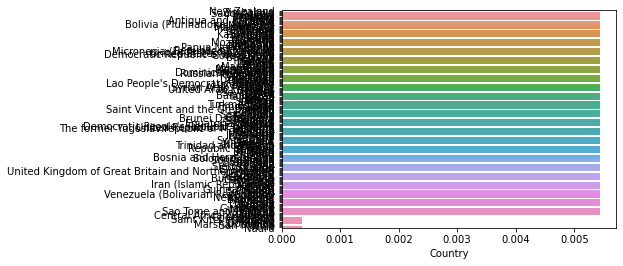

In [9]:
#Bar plot of Country feature
value_percentages = data['Country'].value_counts(normalize=True, sort=True)
sns.barplot(x=value_percentages, y=value_percentages.index, orient='h', order=value_percentages.index)
plt.show()

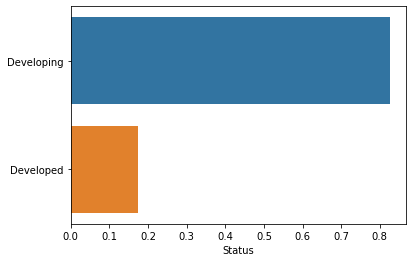

In [10]:
#Bar plot of Status feature
value_percentages = data['Status'].value_counts(normalize=True, sort=True)
sns.barplot(x=value_percentages, y=value_percentages.index, orient='h', order=value_percentages.index)
plt.show()

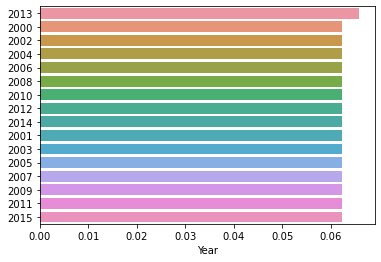

In [11]:
value_percentages = data['Year'].value_counts(normalize=True, sort=True)
sns.barplot(x=value_percentages, y=value_percentages.index, orient='h', order=value_percentages.index)
plt.show()

#  Numerical Features

In [12]:
columns=np.array(data.columns)
categorical_columns=np.array(categorical_columns)
columns
index=[0,1,2]

In [13]:
columns=np.delete(columns,index)

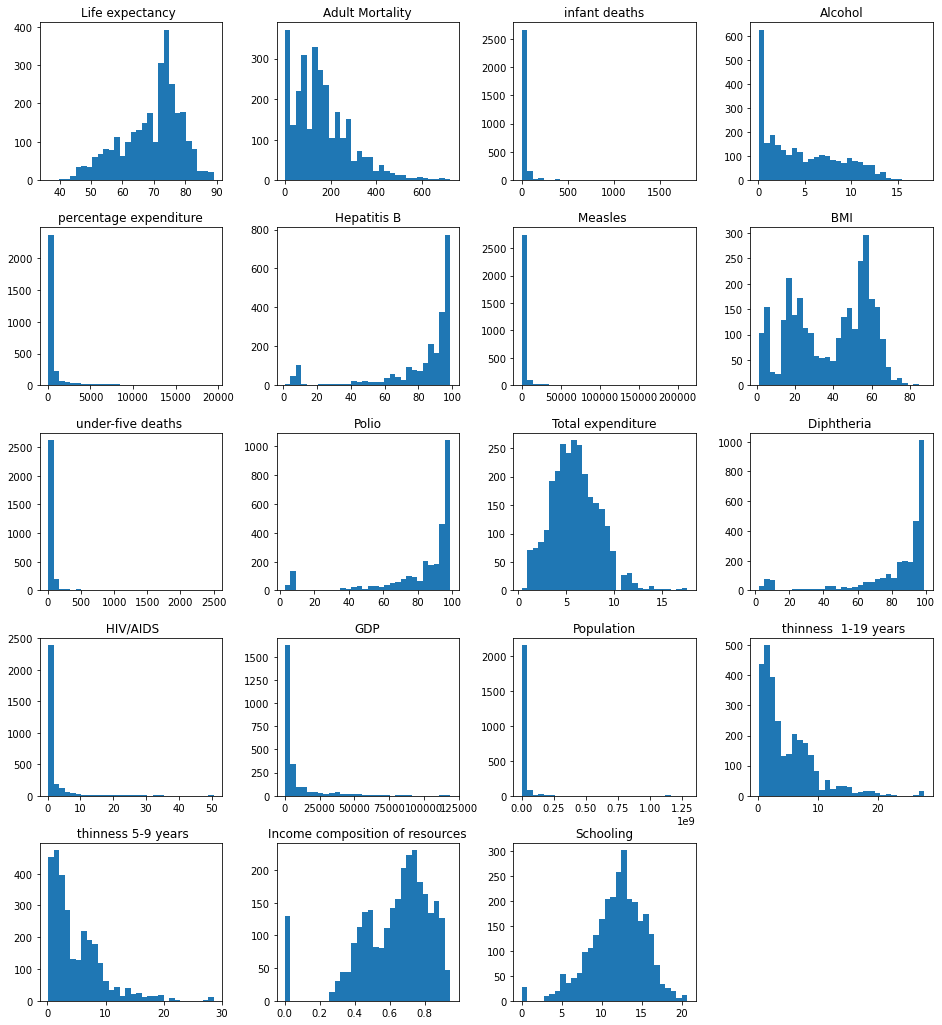

In [14]:
data[columns].hist(bins=30, figsize = (16,18),grid=False)
plt.show()

In [15]:
numerical_columns = set(data.columns) - set(categorical_columns)
numerical_columns

{' BMI ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Adult Mortality',
 'Alcohol',
 'Diphtheria ',
 'GDP',
 'Hepatitis B',
 'Income composition of resources',
 'Life expectancy ',
 'Measles ',
 'Polio',
 'Population',
 'Schooling',
 'Total expenditure',
 'infant deaths',
 'percentage expenditure',
 'under-five deaths '}

In [16]:
#Some istatistical information of numerical features
data[columns].describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.29e+03,2904.00,2904.00,2771.00,2775.00
mean,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.28e+07,4.84,4.87,0.63,11.99
std,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.10e+07,4.42,4.51,0.21,3.36
min,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.40e+01,0.10,0.10,0.00,0.00
25%,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.96e+05,1.60,1.50,0.49,10.10
50%,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1.39e+06,3.30,3.30,0.68,12.30
75%,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.42e+06,7.20,7.20,0.78,14.30
max,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.29e+09,27.70,28.60,0.95,20.70


In [17]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.28,65.0,1154,...,6.0,8.16,65.0,0.1,584.26,3.37e+07,17.2,17.3,0.48,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.52,62.0,492,...,58.0,8.18,62.0,0.1,612.70,3.28e+05,17.5,17.5,0.48,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.22,64.0,430,...,62.0,8.13,64.0,0.1,631.74,3.17e+07,17.7,17.7,0.47,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.18,67.0,2787,...,67.0,8.52,67.0,0.1,669.96,3.70e+06,17.9,18.0,0.46,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.10,68.0,3013,...,68.0,7.87,68.0,0.1,63.54,2.98e+06,18.2,18.2,0.45,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.68,66.0,1989,...,66.0,9.20,66.0,0.1,553.33,2.88e+06,18.4,18.4,0.45,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.76,63.0,2861,...,63.0,9.42,63.0,0.1,445.89,2.84e+05,18.6,18.7,0.43,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.87,64.0,1599,...,64.0,8.33,64.0,0.1,373.36,2.73e+06,18.8,18.9,0.43,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.91,63.0,1141,...,63.0,6.73,63.0,0.1,369.84,2.66e+07,19.0,19.1,0.41,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.17,64.0,1990,...,58.0,7.43,58.0,0.1,272.56,2.59e+06,19.2,19.3,0.41,8.1


In [18]:
data.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.04,73.0,853,...,69.0,6.26,73.0,18.1,65.82,1.38e+06,7.5,7.4,0.42,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.84,75.0,0,...,75.0,4.96,75.0,20.5,325.68,1.36e+07,7.8,7.8,0.42,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.81,72.0,242,...,73.0,4.47,73.0,23.7,397.00,1.33e+06,8.2,8.2,0.41,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.26,68.0,212,...,71.0,5.12,7.0,26.8,414.80,1.31e+07,8.6,8.6,0.41,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.72,65.0,420,...,69.0,6.44,68.0,30.3,444.77,1.29e+05,9.0,9.0,0.41,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.00,68.0,31,...,67.0,7.13,65.0,33.6,454.37,1.28e+07,9.4,9.4,0.41,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.00,7.0,998,...,7.0,6.52,68.0,36.7,453.35,1.26e+07,9.8,9.9,0.42,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.00,73.0,304,...,73.0,6.53,71.0,39.8,57.35,1.26e+05,1.2,1.3,0.43,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.00,76.0,529,...,76.0,6.16,75.0,42.1,548.59,1.24e+07,1.6,1.7,0.43,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.00,79.0,1483,...,78.0,7.10,78.0,43.5,547.36,1.22e+07,11.0,11.2,0.43,9.8


# Data Preprocessing

In [19]:
#Copy the original dataframe before changing operations
df = data.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [21]:
df.drop(["Country"], axis=1,inplace=True)

In [22]:
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.28,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.26,3.37e+07,17.2,17.3,0.48,10.1
1,2014,0,59.9,271.0,64,0.01,73.52,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.70,3.28e+05,17.5,17.5,0.48,10.0
2,2013,0,59.9,268.0,66,0.01,73.22,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.74,3.17e+07,17.7,17.7,0.47,9.9
3,2012,0,59.5,272.0,69,0.01,78.18,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.96,3.70e+06,17.9,18.0,0.46,9.8
4,2011,0,59.2,275.0,71,0.01,7.10,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.54,2.98e+06,18.2,18.2,0.45,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.00,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.37,1.28e+07,9.4,9.4,0.41,9.2
2934,2003,0,44.5,715.0,26,4.06,0.00,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.35,1.26e+07,9.8,9.9,0.42,9.5
2935,2002,0,44.8,73.0,25,4.43,0.00,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.35,1.26e+05,1.2,1.3,0.43,10.0
2936,2001,0,45.3,686.0,25,1.72,0.00,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.59,1.24e+07,1.6,1.7,0.43,9.8


In [119]:
#df[["Year"]]=df[["Year"]].astype(object)
#encodedDf=pd.get_dummies(df[["Year"]])
#encodedDf
#I have encoded the year property here, but I couldn't use it afterwards because it was confusing the graphics and data.

In [24]:
#df=pd.get_dummies(df)
#df

# Handling with Missing Values

In [25]:
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
Year                                 0
 HIV/AIDS                            0
Status                               0
Measles                              0
percentage expenditure               0
infant deaths                        0
under-five deaths                    0
dtype: int64

In [26]:
df["Population"]=df["Population"].fillna(df["Population"].mean())
df["Hepatitis B"]=df["Hepatitis B"].fillna(df["Hepatitis B"].mean())
df["GDP"]=df["GDP"].fillna(df["GDP"].mean())
df["Total expenditure"]=df["Total expenditure"].fillna(df["Total expenditure"].mean())
df["Alcohol"]=df["Alcohol"].fillna(df["Alcohol"].mean())
df["Income composition of resources"]=df["Income composition of resources"].fillna(df["Income composition of resources"].mean())
df["Schooling"]=df["Schooling"].fillna(df["Schooling"].mean())
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.28,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.26,3.37e+07,17.2,17.3,0.48,10.1
1,2014,0,59.9,271.0,64,0.01,73.52,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.70,3.28e+05,17.5,17.5,0.48,10.0
2,2013,0,59.9,268.0,66,0.01,73.22,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.74,3.17e+07,17.7,17.7,0.47,9.9
3,2012,0,59.5,272.0,69,0.01,78.18,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.96,3.70e+06,17.9,18.0,0.46,9.8
4,2011,0,59.2,275.0,71,0.01,7.10,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.54,2.98e+06,18.2,18.2,0.45,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.00,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.37,1.28e+07,9.4,9.4,0.41,9.2
2934,2003,0,44.5,715.0,26,4.06,0.00,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.35,1.26e+07,9.8,9.9,0.42,9.5
2935,2002,0,44.8,73.0,25,4.43,0.00,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.35,1.26e+05,1.2,1.3,0.43,10.0
2936,2001,0,45.3,686.0,25,1.72,0.00,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.59,1.24e+07,1.6,1.7,0.43,9.8


In [27]:
df.isnull().sum().sort_values(ascending=False)

 thinness 5-9 years                34
 thinness  1-19 years              34
 BMI                               34
Diphtheria                         19
Polio                              19
Life expectancy                    10
Adult Mortality                    10
Year                                0
Income composition of resources     0
Population                          0
GDP                                 0
 HIV/AIDS                           0
under-five deaths                   0
Total expenditure                   0
Status                              0
Measles                             0
Hepatitis B                         0
percentage expenditure              0
Alcohol                             0
infant deaths                       0
Schooling                           0
dtype: int64

In [28]:
df.dropna(inplace=True) #remove the rows missing values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2888 non-null   int64  
 1   Status                           2888 non-null   int64  
 2   Life expectancy                  2888 non-null   float64
 3   Adult Mortality                  2888 non-null   float64
 4   infant deaths                    2888 non-null   int64  
 5   Alcohol                          2888 non-null   float64
 6   percentage expenditure           2888 non-null   float64
 7   Hepatitis B                      2888 non-null   float64
 8   Measles                          2888 non-null   int64  
 9    BMI                             2888 non-null   float64
 10  under-five deaths                2888 non-null   int64  
 11  Polio                            2888 non-null   float64
 12  Total expenditure   

In [30]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

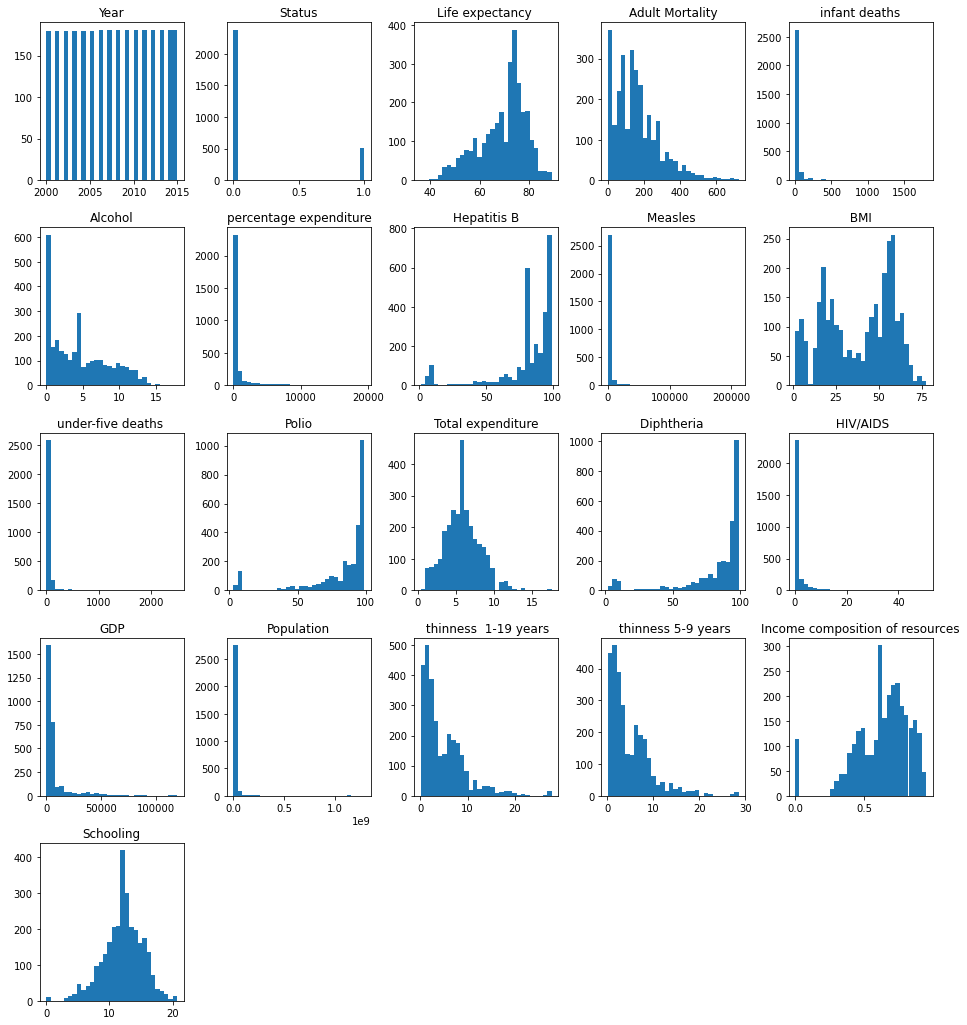

In [31]:
df.hist(bins=30, figsize = (16,18),grid=False)
plt.show()

# Observing Correlations

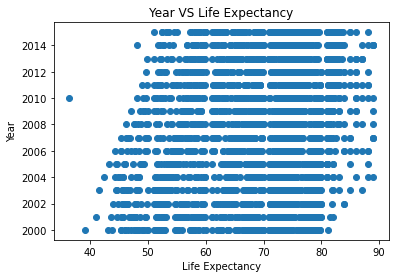

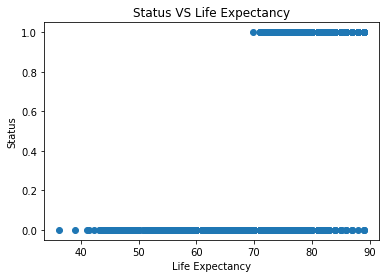

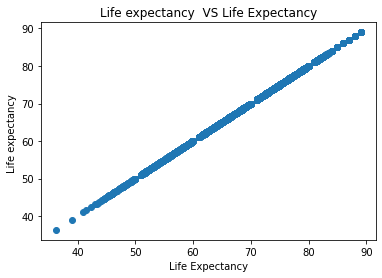

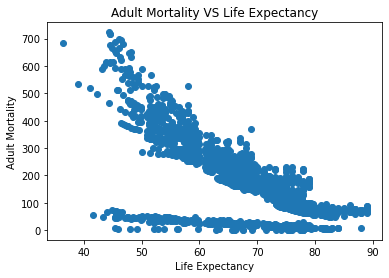

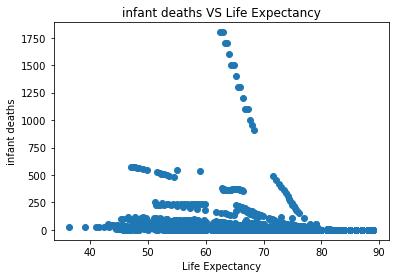

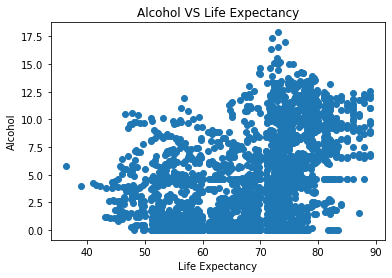

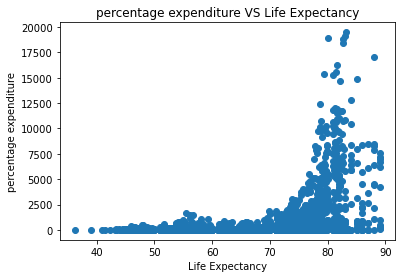

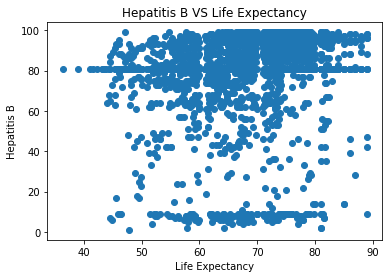

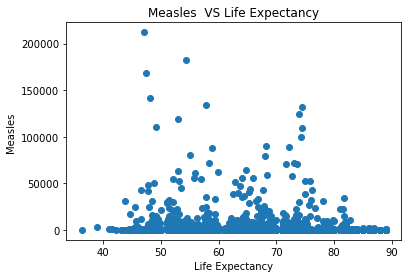

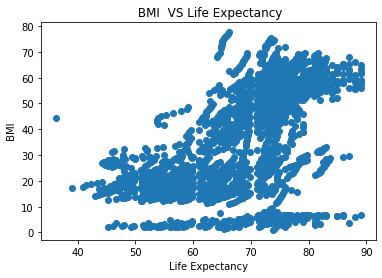

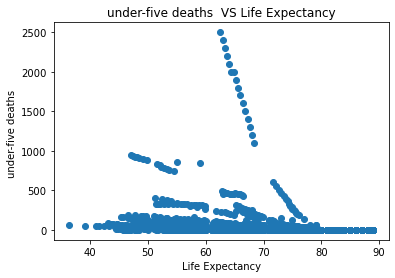

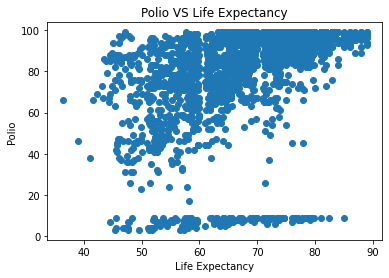

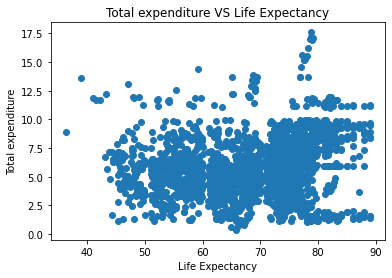

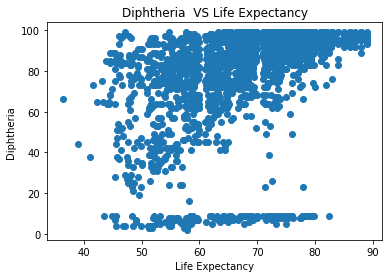

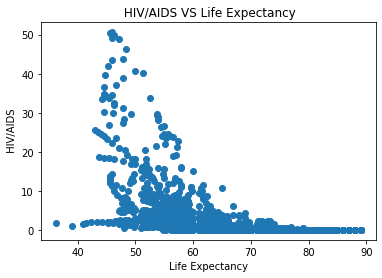

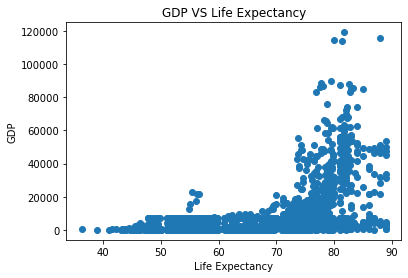

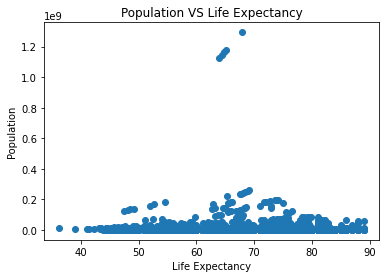

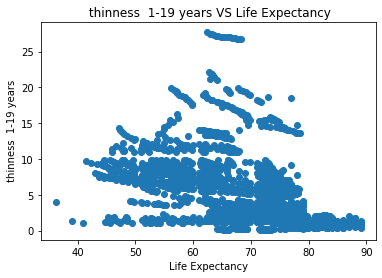

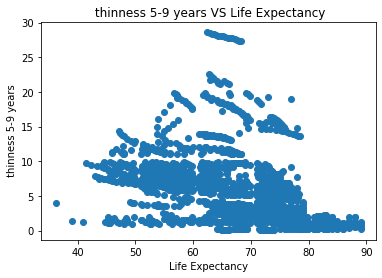

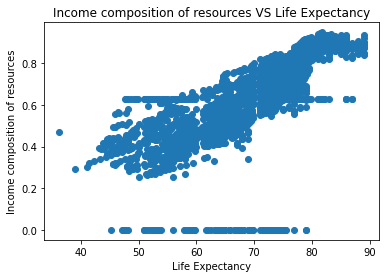

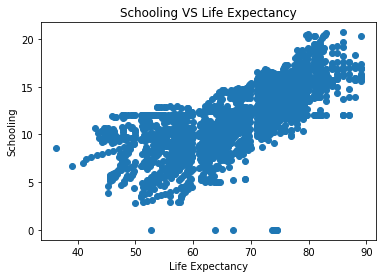

In [32]:
columns=df.columns
for i in columns:
    plt.scatter(df['Life expectancy '],df[i])
    plt.ylabel(str(i))
    plt.xlabel("Life Expectancy")
    plt.title( str(i)+" VS Life Expectancy")
    plt.show()

In [33]:
correlation=df.corr(method="pearson").round(2)
correlation

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.00,-0.00,0.17,-0.08,-0.04,-0.05,0.03,0.09,-0.08,0.11,...,0.10,0.08,0.14,-0.14,0.09,0.01,-0.04,-0.05,0.23,0.21
Status,-0.00,1.00,0.48,-0.31,-0.11,0.58,0.45,0.10,-0.08,0.32,...,0.22,0.30,0.22,-0.15,0.44,-0.04,-0.37,-0.37,0.46,0.50
Life expectancy,0.17,0.48,1.00,-0.69,-0.20,0.39,0.38,0.21,-0.16,0.57,...,0.46,0.21,0.48,-0.56,0.43,-0.02,-0.48,-0.47,0.69,0.73
Adult Mortality,-0.08,-0.31,-0.69,1.00,0.08,-0.19,-0.24,-0.14,0.03,-0.39,...,-0.27,-0.11,-0.27,0.53,-0.28,-0.01,0.30,0.31,-0.43,-0.43
infant deaths,-0.04,-0.11,-0.20,0.08,1.00,-0.11,-0.09,-0.18,0.50,-0.23,...,-0.17,-0.13,-0.18,0.03,-0.11,0.55,0.47,0.47,-0.15,-0.20
Alcohol,-0.05,0.58,0.39,-0.19,-0.11,1.00,0.34,0.07,-0.05,0.33,...,0.21,0.30,0.22,-0.05,0.32,-0.03,-0.42,-0.41,0.42,0.51
percentage expenditure,0.03,0.45,0.38,-0.24,-0.09,0.34,1.00,0.01,-0.06,0.23,...,0.15,0.18,0.14,-0.10,0.89,-0.03,-0.25,-0.25,0.38,0.40
Hepatitis B,0.09,0.10,0.21,-0.14,-0.18,0.07,0.01,1.00,-0.09,0.14,...,0.41,0.06,0.50,-0.10,0.06,-0.11,-0.11,-0.11,0.15,0.17
Measles,-0.08,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.09,1.00,-0.18,...,-0.14,-0.10,-0.14,0.03,-0.07,0.24,0.22,0.22,-0.12,-0.13
BMI,0.11,0.32,0.57,-0.39,-0.23,0.33,0.23,0.14,-0.18,1.00,...,0.29,0.23,0.29,-0.24,0.28,-0.06,-0.53,-0.54,0.50,0.55


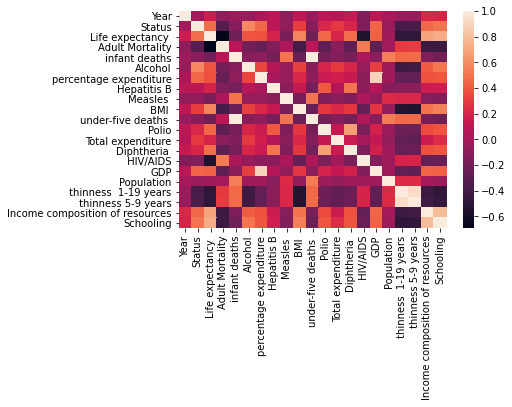

In [34]:
sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels = df.columns)
plt.show()

In [35]:
print("Correlation with the target variable")
corr=correlation['Life expectancy '].abs().sort_values(ascending=False)[1:]
corr

Correlation with the target variable


Schooling                          0.73
Adult Mortality                    0.69
Income composition of resources    0.69
 BMI                               0.57
 HIV/AIDS                          0.56
 thinness  1-19 years              0.48
Status                             0.48
Diphtheria                         0.48
 thinness 5-9 years                0.47
Polio                              0.46
GDP                                0.43
Alcohol                            0.39
percentage expenditure             0.38
under-five deaths                  0.22
Total expenditure                  0.21
Hepatitis B                        0.21
infant deaths                      0.20
Year                               0.17
Measles                            0.16
Population                         0.02
Name: Life expectancy , dtype: float64

In [36]:
threshold = 0.40
high_corr = corr[(abs(corr) > threshold)]
high_corr

Schooling                          0.73
Adult Mortality                    0.69
Income composition of resources    0.69
 BMI                               0.57
 HIV/AIDS                          0.56
 thinness  1-19 years              0.48
Status                             0.48
Diphtheria                         0.48
 thinness 5-9 years                0.47
Polio                              0.46
GDP                                0.43
Name: Life expectancy , dtype: float64

In [37]:
myreg=LinearRegression()

In [38]:
#target feature life_expectancy
y=df["Life expectancy "]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2888, dtype: float64

# Model 1 => with higher correlations than 0.40

In [39]:
X1=df[["Schooling","Adult Mortality","Income composition of resources"," BMI "," HIV/AIDS"," thinness  1-19 years","Status","Diphtheria "," thinness 5-9 years","Polio","GDP"]]
X1

,Schooling,Adult Mortality,Income composition of resources,BMI,HIV/AIDS,thinness 1-19 years,Status,Diphtheria,thinness 5-9 years,Polio,GDP
0,10.1,263.0,0.48,19.1,0.1,17.2,0,65.0,17.3,6.0,584.26
1,10.0,271.0,0.48,18.6,0.1,17.5,0,62.0,17.5,58.0,612.70
2,9.9,268.0,0.47,18.1,0.1,17.7,0,64.0,17.7,62.0,631.74
3,9.8,272.0,0.46,17.6,0.1,17.9,0,67.0,18.0,67.0,669.96
4,9.5,275.0,0.45,17.2,0.1,18.2,0,68.0,18.2,68.0,63.54
...,...,...,...,...,...,...,...,...,...,...,...
2933,9.2,723.0,0.41,27.1,33.6,9.4,0,65.0,9.4,67.0,454.37
2934,9.5,715.0,0.42,26.7,36.7,9.8,0,68.0,9.9,7.0,453.35
2935,10.0,73.0,0.43,26.3,39.8,1.2,0,71.0,1.3,73.0,57.35
2936,9.8,686.0,0.43,25.9,42.1,1.6,0,75.0,1.7,76.0,548.59


In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=147)

scaler = StandardScaler()
scaled_X1_train = scaler.fit_transform(X1_train)
scaled_X1_test = scaler.transform(X1_test)

In [41]:
model1=myreg.fit(scaled_X1_train,y1_train)

In [42]:
model1.coef_

array([ 2.46448284, -2.48094465,  1.25711066,  0.8018648 , -2.40839807,
       -0.4236725 ,  0.61273756,  0.99666441,  0.04139824,  0.68501438,
        0.5225653 ])

In [43]:
model1.intercept_

69.47796536796537

In [44]:
model1.score(scaled_X1_test,y1_test)

0.8358352155777296

In [45]:
y1_predict=model1.predict(scaled_X1_test)

In [46]:
np_y1_test=np.array(y1_test)

In [47]:
for i in range(len(y1_predict)):
    print("Predicted value: ", y1_predict[i]," Actual Value:", np_y1_test[i])

Predicted value:  79.68388521712598  Actual Value: 79.0
Predicted value:  80.13134345793142  Actual Value: 78.1
Predicted value:  67.08094342109206  Actual Value: 71.0
Predicted value:  58.18422235006573  Actual Value: 54.3
Predicted value:  70.2465890315115  Actual Value: 72.2
Predicted value:  65.195870899499  Actual Value: 62.5
Predicted value:  78.15715027121614  Actual Value: 75.8
Predicted value:  70.24900391007148  Actual Value: 69.6
Predicted value:  69.60836314689324  Actual Value: 67.0
Predicted value:  63.09954258702124  Actual Value: 61.9
Predicted value:  74.62806833862362  Actual Value: 74.1
Predicted value:  51.72251405820758  Actual Value: 52.1
Predicted value:  77.02236965397861  Actual Value: 79.8
Predicted value:  70.8682550327808  Actual Value: 73.0
Predicted value:  76.9717233079607  Actual Value: 75.9
Predicted value:  63.817685839614064  Actual Value: 63.8
Predicted value:  69.06293257226024  Actual Value: 73.1
Predicted value:  65.57783026393176  Actual Value: 6

Predicted value:  61.71912019815012  Actual Value: 59.6
Predicted value:  67.04638715782977  Actual Value: 68.9
Predicted value:  78.05323652526704  Actual Value: 83.0
Predicted value:  58.443213466254555  Actual Value: 59.9
Predicted value:  76.87246570555128  Actual Value: 78.2
Predicted value:  44.50562346685833  Actual Value: 46.4
Predicted value:  79.46994584516858  Actual Value: 81.6
Predicted value:  72.59300378927871  Actual Value: 74.2
Predicted value:  61.51350196489369  Actual Value: 51.6
Predicted value:  76.65143795838932  Actual Value: 68.7
Predicted value:  62.385286077805446  Actual Value: 63.3
Predicted value:  79.71880362434459  Actual Value: 79.2
Predicted value:  64.94915791839033  Actual Value: 64.0
Predicted value:  73.79715118554321  Actual Value: 76.0
Predicted value:  74.58522573343001  Actual Value: 77.8
Predicted value:  66.74336080846777  Actual Value: 63.0
Predicted value:  72.07413464616613  Actual Value: 74.0
Predicted value:  52.160200480916984  Actual V

In [48]:
mean_squared_error(y1_test,y1_predict)

14.450563375897888

In [49]:
mean_squared_error(y1_test,y1_predict, squared=False)

3.8013896637805873

In [50]:
mean_absolute_error(y1_test,y1_predict)

2.8024592946419387

In [51]:
r2_score(y1_test,y1_predict)

0.8358352155777296

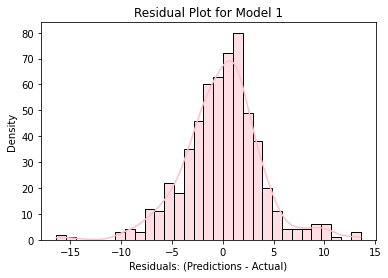

In [52]:
sns.histplot(y1_predict-np_y1_test, kde=True, color="pink")
plt.title('Residual Plot for Model 1')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [53]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
_str="y="
for i,m in enumerate(model1.coef_):
    _str+= "x_{}*{}+".format(i, m)
_str+=str(model1.intercept_)
print(_str)

y=x_0*2.4644828421806277+x_1*-2.480944653027834+x_2*1.2571106612006229+x_3*0.8018648046784954+x_4*-2.4083980739700332+x_5*-0.42367250484028435+x_6*0.6127375586307655+x_7*0.9966644113380165+x_8*0.04139824171507654+x_9*0.6850143785578259+x_10*0.5225653041141215+69.47796536796537


# Model 2

In [54]:
X2=df[["Schooling","Population","Hepatitis B","Income composition of resources","Total expenditure","Alcohol","GDP","Adult Mortality"]]
X2

,Schooling,Population,Hepatitis B,Income composition of resources,Total expenditure,Alcohol,GDP,Adult Mortality
0,10.1,3.37e+07,65.0,0.48,8.16,0.01,584.26,263.0
1,10.0,3.28e+05,62.0,0.48,8.18,0.01,612.70,271.0
2,9.9,3.17e+07,64.0,0.47,8.13,0.01,631.74,268.0
3,9.8,3.70e+06,67.0,0.46,8.52,0.01,669.96,272.0
4,9.5,2.98e+06,68.0,0.45,7.87,0.01,63.54,275.0
...,...,...,...,...,...,...,...,...
2933,9.2,1.28e+07,68.0,0.41,7.13,4.36,454.37,723.0
2934,9.5,1.26e+07,7.0,0.42,6.52,4.06,453.35,715.0
2935,10.0,1.26e+05,73.0,0.43,6.53,4.43,57.35,73.0
2936,9.8,1.24e+07,76.0,0.43,6.16,1.72,548.59,686.0


In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=147)

scaler = StandardScaler()
scaled_X2_train = scaler.fit_transform(X2_train)
scaled_X2_test = scaler.transform(X2_test)

In [56]:
model2=myreg.fit(scaled_X2_train,y2_train)

In [57]:
y2_predict=model2.predict(scaled_X2_test)

In [58]:
np_y2_test=np.array(y2_test)

In [59]:
for i in range(len(y2_predict)):
    print("Predicted value: ", y2_predict[i]," Actual Value:", np_y2_test[i])

Predicted value:  80.4446428750707  Actual Value: 79.0
Predicted value:  80.9713708859636  Actual Value: 78.1
Predicted value:  65.70686870987511  Actual Value: 71.0
Predicted value:  54.42492129772246  Actual Value: 54.3
Predicted value:  70.59617669889211  Actual Value: 72.2
Predicted value:  63.83412784889011  Actual Value: 62.5
Predicted value:  76.5796176181158  Actual Value: 75.8
Predicted value:  69.63336621815986  Actual Value: 69.6
Predicted value:  71.42611194296644  Actual Value: 67.0
Predicted value:  62.89123857008671  Actual Value: 61.9
Predicted value:  74.8682375207911  Actual Value: 74.1
Predicted value:  53.38222545321039  Actual Value: 52.1
Predicted value:  77.2289810039847  Actual Value: 79.8
Predicted value:  69.55917345846478  Actual Value: 73.0
Predicted value:  74.96177305173124  Actual Value: 75.9
Predicted value:  62.70931404462016  Actual Value: 63.8
Predicted value:  69.18621239897699  Actual Value: 73.1
Predicted value:  68.5561115246737  Actual Value: 69.

Predicted value:  64.92250848154903  Actual Value: 62.1
Predicted value:  59.14384887532961  Actual Value: 63.0
Predicted value:  82.27451155392458  Actual Value: 81.6
Predicted value:  58.57762478552778  Actual Value: 53.1
Predicted value:  65.01575018538242  Actual Value: 75.5
Predicted value:  64.4762109004258  Actual Value: 68.8
Predicted value:  68.71348341398603  Actual Value: 68.5
Predicted value:  72.51981742786353  Actual Value: 73.0
Predicted value:  60.68206002681838  Actual Value: 56.2
Predicted value:  60.98812512152881  Actual Value: 64.7
Predicted value:  71.03390356928928  Actual Value: 64.9
Predicted value:  58.2185174053774  Actual Value: 57.3
Predicted value:  71.85140338601097  Actual Value: 74.6
Predicted value:  64.66523446047628  Actual Value: 65.1
Predicted value:  66.87759290599463  Actual Value: 78.0
Predicted value:  56.53479537169291  Actual Value: 64.4
Predicted value:  78.95305978027253  Actual Value: 78.6
Predicted value:  71.51148597538456  Actual Value:

In [60]:
model2.coef_

array([ 3.16793295, -0.00717244,  0.46159328,  1.79248276,  0.2296662 ,
        0.28233031,  0.61330846, -4.11066663])

In [61]:
model2.intercept_

69.47796536796537

In [62]:
model2.score(scaled_X2_test,y2_test)

0.7496447534640205

In [63]:
mean_squared_error(y2_test,y2_predict)

22.037456871693916

In [64]:
mean_squared_error(y2_test,y2_predict, squared=False)

4.694406977637741

In [65]:
mean_absolute_error(y2_test,y2_predict)

3.23644534873508

In [66]:
r2_score(y2_test,y2_predict)

0.7496447534640205

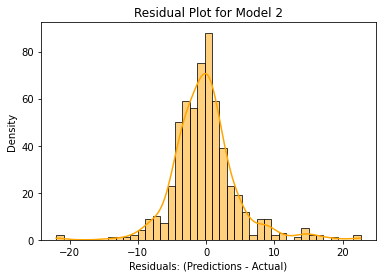

In [67]:
sns.histplot(y2_predict-np_y2_test, kde=True, color="orange")
plt.title('Residual Plot for Model 2')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [68]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
_str="y="
for i,m in enumerate(model2.coef_):
    _str+= "x_{}*{}+".format(i, m)
_str+=str(model2.intercept_)
print(_str)

y=x_0*3.1679329480433727+x_1*-0.007172438107427641+x_2*0.4615932756744629+x_3*1.79248276201666+x_4*0.22966620436045773+x_5*0.28233030611642734+x_6*0.6133084645620185+x_7*-4.1106666347028815+69.47796536796537


# Model 3 with highest 8 correlation

In [69]:
X3=df[["Schooling","Adult Mortality","Income composition of resources"," BMI "," HIV/AIDS"," thinness  1-19 years","Status","Diphtheria "]]
X3

,Schooling,Adult Mortality,Income composition of resources,BMI,HIV/AIDS,thinness 1-19 years,Status,Diphtheria
0,10.1,263.0,0.48,19.1,0.1,17.2,0,65.0
1,10.0,271.0,0.48,18.6,0.1,17.5,0,62.0
2,9.9,268.0,0.47,18.1,0.1,17.7,0,64.0
3,9.8,272.0,0.46,17.6,0.1,17.9,0,67.0
4,9.5,275.0,0.45,17.2,0.1,18.2,0,68.0
...,...,...,...,...,...,...,...,...
2933,9.2,723.0,0.41,27.1,33.6,9.4,0,65.0
2934,9.5,715.0,0.42,26.7,36.7,9.8,0,68.0
2935,10.0,73.0,0.43,26.3,39.8,1.2,0,71.0
2936,9.8,686.0,0.43,25.9,42.1,1.6,0,75.0


In [70]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=147)

scaler = StandardScaler()
scaled_X3_train = scaler.fit_transform(X3_train)
scaled_X3_test = scaler.transform(X3_test)

In [71]:
model3=myreg.fit(scaled_X3_train,y3_train)

In [72]:
y3_predict=model3.predict(scaled_X3_test)

In [73]:
np_y3_test=np.array(y3_test)

In [74]:
for i in range(len(y3_predict)):
    print("Predicted value: ", y3_predict[i]," Actual Value:", np_y3_test[i])

Predicted value:  79.2030525796185  Actual Value: 79.0
Predicted value:  79.64808092838287  Actual Value: 78.1
Predicted value:  67.19277662330458  Actual Value: 71.0
Predicted value:  57.92422185990794  Actual Value: 54.3
Predicted value:  70.25289542166075  Actual Value: 72.2
Predicted value:  65.17902971412384  Actual Value: 62.5
Predicted value:  78.56622074274017  Actual Value: 75.8
Predicted value:  70.45047259275853  Actual Value: 69.6
Predicted value:  69.70060138667807  Actual Value: 67.0
Predicted value:  61.62489044705294  Actual Value: 61.9
Predicted value:  74.6311868318282  Actual Value: 74.1
Predicted value:  51.58983996366307  Actual Value: 52.1
Predicted value:  77.39016460660444  Actual Value: 79.8
Predicted value:  70.83270124207712  Actual Value: 73.0
Predicted value:  77.19972834204813  Actual Value: 75.9
Predicted value:  63.92658327538785  Actual Value: 63.8
Predicted value:  68.97006309647023  Actual Value: 73.1
Predicted value:  68.03736674190732  Actual Value:

Predicted value:  61.984741004055  Actual Value: 62.0
Predicted value:  74.90049820320601  Actual Value: 78.2
Predicted value:  59.64938386252783  Actual Value: 54.3
Predicted value:  70.82802191559132  Actual Value: 73.7
Predicted value:  60.30226759526992  Actual Value: 65.8
Predicted value:  71.22315960889644  Actual Value: 75.1
Predicted value:  76.07514286458051  Actual Value: 78.5
Predicted value:  68.26467735352139  Actual Value: 71.1
Predicted value:  68.97978783348061  Actual Value: 68.0
Predicted value:  81.44998009215247  Actual Value: 82.3
Predicted value:  61.02505164475452  Actual Value: 56.2
Predicted value:  49.63601587461736  Actual Value: 52.6
Predicted value:  78.48921181779045  Actual Value: 76.6
Predicted value:  69.513255583779  Actual Value: 68.8
Predicted value:  76.74132623401088  Actual Value: 76.5
Predicted value:  70.82078217473364  Actual Value: 68.7
Predicted value:  80.948700051057  Actual Value: 81.9
Predicted value:  58.95896845434721  Actual Value: 63.

Predicted value:  68.28579545518069  Actual Value: 71.1
Predicted value:  70.3326248691084  Actual Value: 66.3
Predicted value:  72.85361966877112  Actual Value: 78.8
Predicted value:  59.04860973356993  Actual Value: 57.4
Predicted value:  80.70429704336932  Actual Value: 78.9
Predicted value:  70.62064155888578  Actual Value: 69.4
Predicted value:  81.33330058669871  Actual Value: 78.0
Predicted value:  69.47210855827662  Actual Value: 71.4
Predicted value:  72.14559619195819  Actual Value: 79.4
Predicted value:  60.486234518984176  Actual Value: 63.7
Predicted value:  59.10182444279087  Actual Value: 45.5
Predicted value:  62.88478278554645  Actual Value: 61.1
Predicted value:  59.52993164740015  Actual Value: 63.7
Predicted value:  73.72325764074473  Actual Value: 78.9
Predicted value:  72.64012938960434  Actual Value: 73.5
Predicted value:  69.54974909490215  Actual Value: 65.0
Predicted value:  56.86366367375806  Actual Value: 55.3
Predicted value:  75.99939007318427  Actual Valu

In [75]:
model3.coef_

array([ 2.5867233 , -2.55055427,  1.37744653,  0.82821858, -2.38842816,
       -0.38060943,  0.76669062,  1.4016681 ])

In [76]:
model3.intercept_

69.47796536796537

In [77]:
model3.score(scaled_X3_test,y3_test)

0.8300480618600894

In [78]:
mean_squared_error(y3_test,y3_predict)

14.959976109311604

In [79]:
mean_squared_error(y3_test,y3_predict, squared=False)

3.8678128327662913

In [80]:
mean_absolute_error(y3_test,y3_predict)

2.8289846310088587

In [81]:
r2_score(y3_test,y3_predict)

0.8300480618600894

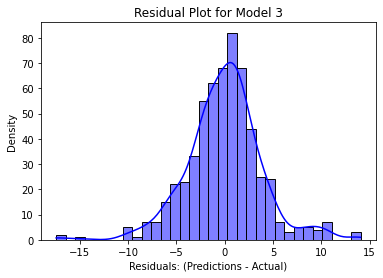

In [82]:
sns.histplot(y3_predict-np_y3_test, kde=True, color="blue")
plt.title('Residual Plot for Model 3')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [118]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
_str="y="
for i,m in enumerate((model3.coef_).round(2)):
    _str+= "x_{}*{}+".format(i, m)
_str+=str((model3.intercept_).round(2))
print(_str)

y=x_0*-0.08+x_1*0.6+x_2*-2.41+x_3*11.88+x_4*0.16+x_5*0.1+x_6*-0.3+x_7*-0.23+x_8*0.75+x_9*-12.06+x_10*0.65+x_11*0.08+x_12*0.96+x_13*-2.39+x_14*0.48+x_15*0.01+x_16*-0.34+x_17*0.02+x_18*1.18+x_19*2.34+69.48


# Model 4

In [84]:
X4=df[[" BMI "," HIV/AIDS"," thinness  1-19 years","Status","Diphtheria "," thinness 5-9 years","Polio","GDP"]]
X4

,BMI,HIV/AIDS,thinness 1-19 years,Status,Diphtheria,thinness 5-9 years,Polio,GDP
0,19.1,0.1,17.2,0,65.0,17.3,6.0,584.26
1,18.6,0.1,17.5,0,62.0,17.5,58.0,612.70
2,18.1,0.1,17.7,0,64.0,17.7,62.0,631.74
3,17.6,0.1,17.9,0,67.0,18.0,67.0,669.96
4,17.2,0.1,18.2,0,68.0,18.2,68.0,63.54
...,...,...,...,...,...,...,...,...
2933,27.1,33.6,9.4,0,65.0,9.4,67.0,454.37
2934,26.7,36.7,9.8,0,68.0,9.9,7.0,453.35
2935,26.3,39.8,1.2,0,71.0,1.3,73.0,57.35
2936,25.9,42.1,1.6,0,75.0,1.7,76.0,548.59


In [85]:
X4_train, X4_test, y4_train, y4_test=train_test_split(X4,y,test_size=0.2, random_state=0)

scaler = StandardScaler()
scaled_X4_train = scaler.fit_transform(X4_train)
scaled_X4_test = scaler.transform(X4_test)

In [86]:
model4=myreg.fit(scaled_X4_train,y4_train)

In [87]:
y4_predict=model4.predict(scaled_X4_test)

In [88]:
np_y4_test=np.array(y4_test)

In [89]:
for i in range(len(y4_predict)):
    print("Predicted value: ", y4_predict[i]," Actual Value:", np_y4_test[i])

Predicted value:  78.80561455318971  Actual Value: 74.5
Predicted value:  56.007480126193  Actual Value: 57.6
Predicted value:  72.66911144070745  Actual Value: 74.8
Predicted value:  64.921978448839  Actual Value: 65.0
Predicted value:  61.93173100946235  Actual Value: 53.6
Predicted value:  79.23570283502148  Actual Value: 78.1
Predicted value:  73.50937009861035  Actual Value: 68.6
Predicted value:  78.19986888113569  Actual Value: 78.7
Predicted value:  70.184442454187  Actual Value: 71.6
Predicted value:  82.92698501596833  Actual Value: 81.7
Predicted value:  65.4261346252949  Actual Value: 67.0
Predicted value:  46.38842985109171  Actual Value: 43.1
Predicted value:  71.47740540927842  Actual Value: 69.6
Predicted value:  59.00514763918636  Actual Value: 58.5
Predicted value:  79.33842099702926  Actual Value: 77.5
Predicted value:  60.56091413055447  Actual Value: 54.1
Predicted value:  63.97812869799417  Actual Value: 65.4
Predicted value:  73.31950449205726  Actual Value: 74.1

Predicted value:  70.09954494313925  Actual Value: 71.9
Predicted value:  73.3278336938828  Actual Value: 72.7
Predicted value:  72.49869102243271  Actual Value: 72.6
Predicted value:  67.0340935324791  Actual Value: 67.3
Predicted value:  79.14730884053084  Actual Value: 81.0
Predicted value:  78.7290159596517  Actual Value: 81.2
Predicted value:  71.68959545532688  Actual Value: 63.7
Predicted value:  73.36821379401042  Actual Value: 72.6
Predicted value:  79.43662334899633  Actual Value: 75.8
Predicted value:  62.03473060771159  Actual Value: 66.0
Predicted value:  63.10982556143625  Actual Value: 51.7
Predicted value:  74.44577422970754  Actual Value: 65.0
Predicted value:  60.90657847233852  Actual Value: 54.9
Predicted value:  82.6435157207739  Actual Value: 81.0
Predicted value:  62.271970793390814  Actual Value: 63.7
Predicted value:  60.99838013813503  Actual Value: 63.5
Predicted value:  82.18538756605479  Actual Value: 78.3
Predicted value:  74.0171244620364  Actual Value: 7

Predicted value:  72.61665693509532  Actual Value: 74.4
Predicted value:  73.06130601443924  Actual Value: 76.4
Predicted value:  52.8654593934796  Actual Value: 47.1
Predicted value:  72.58683173264798  Actual Value: 85.0
Predicted value:  69.58538256649554  Actual Value: 67.5
Predicted value:  73.56879417217992  Actual Value: 75.0
Predicted value:  86.47537480538566  Actual Value: 78.7
Predicted value:  63.95746526935712  Actual Value: 57.2
Predicted value:  78.06795181367156  Actual Value: 73.0
Predicted value:  32.392103040889644  Actual Value: 47.1
Predicted value:  71.10739397247241  Actual Value: 63.2
Predicted value:  69.39819656488173  Actual Value: 71.9
Predicted value:  71.60572572108265  Actual Value: 74.2
Predicted value:  77.72305753776814  Actual Value: 71.9
Predicted value:  72.83779889353455  Actual Value: 79.0
Predicted value:  68.27264548397702  Actual Value: 73.0
Predicted value:  82.57069097706702  Actual Value: 81.3
Predicted value:  43.353495518413936  Actual Val

In [90]:
model4.coef_

array([ 2.24176865, -3.58282439, -1.24890044,  1.67215262,  1.66454752,
        0.21468059,  1.16301566,  1.39741542])

In [91]:
model4.intercept_

69.29103896103895

In [92]:
model4.score(scaled_X4_test,y4_test)

0.715438939781616

In [93]:
mean_squared_error(y4_test,y4_predict)

26.09851936701205

In [94]:
mean_squared_error(y4_test,y4_predict, squared=False)

5.108670998118009

In [95]:
mean_absolute_error(y4_test,y4_predict)

4.111281263271731

In [96]:
r2_score(y4_test,y4_predict)

0.715438939781616

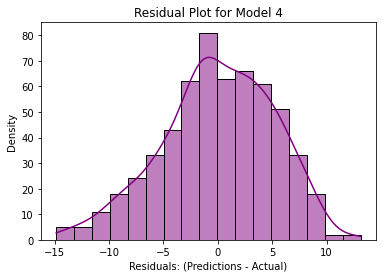

In [97]:
sns.histplot(y4_predict-np_y4_test, kde=True, color="purple")
plt.title('Residual Plot for Model 4')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [98]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
_str="y="
for i,m in enumerate(model4.coef_):
    _str+= "x_{}*{}+".format(i, m)
_str+=str(model4.intercept_)
print(_str)

y=x_0*2.241768647885942+x_1*-3.5828243888960993+x_2*-1.2489004434374518+x_3*1.6721526177984731+x_4*1.6645475190040233+x_5*0.21468058932027378+x_6*1.1630156649169314+x_7*1.3974154206307183+69.29103896103895


# Model 5 with every feature

In [99]:
arr=df.columns
arr=arr.delete(2)
X5=df[arr]
X5

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,263.0,62,0.01,71.28,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.26,3.37e+07,17.2,17.3,0.48,10.1
1,2014,0,271.0,64,0.01,73.52,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.70,3.28e+05,17.5,17.5,0.48,10.0
2,2013,0,268.0,66,0.01,73.22,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.74,3.17e+07,17.7,17.7,0.47,9.9
3,2012,0,272.0,69,0.01,78.18,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.96,3.70e+06,17.9,18.0,0.46,9.8
4,2011,0,275.0,71,0.01,7.10,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.54,2.98e+06,18.2,18.2,0.45,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,723.0,27,4.36,0.00,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.37,1.28e+07,9.4,9.4,0.41,9.2
2934,2003,0,715.0,26,4.06,0.00,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.35,1.26e+07,9.8,9.9,0.42,9.5
2935,2002,0,73.0,25,4.43,0.00,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.35,1.26e+05,1.2,1.3,0.43,10.0
2936,2001,0,686.0,25,1.72,0.00,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.59,1.24e+07,1.6,1.7,0.43,9.8


In [100]:
arr

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [101]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=147)

scaler = StandardScaler()
scaled_X5_train = scaler.fit_transform(X5_train)
scaled_X5_test = scaler.transform(X5_test)

In [102]:
model5=myreg.fit(scaled_X5_train,y5_train)

In [103]:
y5_predict=model5.predict(scaled_X5_test)

In [104]:
np_y5_test=np.array(y5_test)

In [105]:
for i in range(len(y5_predict)):
    print("Predicted value: ", y5_predict[i]," Actual Value:", np_y5_test[i])

Predicted value:  80.83015135871815  Actual Value: 79.0
Predicted value:  80.1880980780171  Actual Value: 78.1
Predicted value:  67.21439258095003  Actual Value: 71.0
Predicted value:  58.017679660101805  Actual Value: 54.3
Predicted value:  70.22818444414035  Actual Value: 72.2
Predicted value:  65.26526149792271  Actual Value: 62.5
Predicted value:  77.85985838268064  Actual Value: 75.8
Predicted value:  70.28604212642841  Actual Value: 69.6
Predicted value:  69.78059841391513  Actual Value: 67.0
Predicted value:  63.814916627466275  Actual Value: 61.9
Predicted value:  75.068957335858  Actual Value: 74.1
Predicted value:  51.597915510183  Actual Value: 52.1
Predicted value:  76.74091830370752  Actual Value: 79.8
Predicted value:  71.05611015040736  Actual Value: 73.0
Predicted value:  77.18907060666875  Actual Value: 75.9
Predicted value:  63.970531912638016  Actual Value: 63.8
Predicted value:  69.29743728351544  Actual Value: 73.1
Predicted value:  65.88262331367795  Actual Value:

Predicted value:  60.18689713661773  Actual Value: 53.9
Predicted value:  79.58255239477865  Actual Value: 78.0
Predicted value:  75.57998335667045  Actual Value: 75.5
Predicted value:  71.45422707530845  Actual Value: 77.5
Predicted value:  71.61695263037697  Actual Value: 81.7
Predicted value:  68.6020255877811  Actual Value: 68.9
Predicted value:  71.79741543991796  Actual Value: 71.8
Predicted value:  78.24351137748204  Actual Value: 77.8
Predicted value:  77.74677647991804  Actual Value: 74.6
Predicted value:  53.90167561528335  Actual Value: 49.2
Predicted value:  69.85384185091728  Actual Value: 75.4
Predicted value:  75.6040509220412  Actual Value: 75.6
Predicted value:  78.75034228320956  Actual Value: 81.1
Predicted value:  74.30310679035769  Actual Value: 72.0
Predicted value:  73.55552803542462  Actual Value: 72.9
Predicted value:  80.97748109896946  Actual Value: 77.5
Predicted value:  67.85231534318989  Actual Value: 73.0
Predicted value:  66.46658878564426  Actual Value:

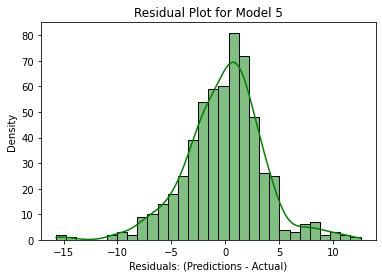

In [106]:
sns.histplot(y5_predict-np_y5_test, kde=True, color="green")
plt.title('Residual Plot for Model 5')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [107]:
model5.coef_

array([-8.09859541e-02,  6.00169261e-01, -2.40765843e+00,  1.18781976e+01,
        1.64015572e-01,  1.00081219e-01, -2.98987316e-01, -2.33005301e-01,
        7.49232031e-01, -1.20565590e+01,  6.46196407e-01,  8.32768266e-02,
        9.56324822e-01, -2.38819682e+00,  4.78695774e-01,  1.07695416e-02,
       -3.44445584e-01,  1.87890061e-02,  1.18468978e+00,  2.34174795e+00])

In [108]:
model5.intercept_

69.47796536796537

In [109]:
model5.score(scaled_X5_test,y5_test)

0.8499441948366913

In [110]:
mean_squared_error(y5_test,y5_predict)

13.208624066755805

In [111]:
mean_squared_error(y5_test,y5_predict, squared=False)

3.6343670792527005

In [112]:
mean_absolute_error(y5_test,y5_predict)

2.703390788009844

In [113]:
r2_score(y5_test,y5_predict)

0.8499441948366913

In [114]:
r2_score?

In [117]:
#y= x1*..+x2*...+ intercept (general formula for linear regression model)
_str="y="
for i,m in enumerate((model5.coef_).round(2)):
    _str+= "x_{}*{}+".format(i, m)
_str+=str((model5.intercept_).round(2))
print(_str)

y=x_0*-0.08+x_1*0.6+x_2*-2.41+x_3*11.88+x_4*0.16+x_5*0.1+x_6*-0.3+x_7*-0.23+x_8*0.75+x_9*-12.06+x_10*0.65+x_11*0.08+x_12*0.96+x_13*-2.39+x_14*0.48+x_15*0.01+x_16*-0.34+x_17*0.02+x_18*1.18+x_19*2.34+69.48
